In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [3]:
train_labels = []
train_samples = []

In [5]:
for i in range(50):
    # The ~5% of younger individuas who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    #the ~5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    #the ~95% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)


In [6]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [9]:
for i in scaled_train_samples:
    print(i)

[0.57471264]
[0.96551724]
[0.93103448]
[0.98850575]
[0.64367816]
[0.94252874]
[0.5862069]
[0.26436782]
[0.16091954]
[0.09195402]
[0.90804598]
[0.14942529]
[0.14942529]
[0.5862069]
[0.13793103]
[0.65517241]
[0.1954023]
[0.89655172]
[0.62068966]
[0.43678161]
[0.8045977]
[0.94252874]
[0.24137931]
[0.95402299]
[0.44827586]
[0.85057471]
[0.96551724]
[0.65517241]
[0.86206897]
[0.48275862]
[0.25287356]
[0.56321839]
[0.40229885]
[0.89655172]
[0.91954023]
[0.56321839]
[0.49425287]
[0.77011494]
[0.90804598]
[0.01149425]
[0.89655172]
[0.65517241]
[0.71264368]
[0.67816092]
[0.4137931]
[0.65517241]
[0.50574713]
[0.13793103]
[0.86206897]
[0.88505747]
[0.12643678]
[0.34482759]
[0.54022989]
[0.72413793]
[0.67816092]
[0.48275862]
[0.95402299]
[0.10344828]
[0.8045977]
[0.95402299]
[0.81609195]
[0.12643678]
[0.42528736]
[0.59770115]
[0.49425287]
[0.10344828]
[0.93103448]
[0.24137931]
[0.44827586]
[0.86206897]
[0.8045977]
[1.]
[0.52873563]
[1.]
[0.57471264]
[0.42528736]
[0.6091954]
[0.57471264]
[0.4022988

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [46]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [47]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 16)                32        
                                                                 
 dense_29 (Dense)            (None, 32)                544       
                                                                 
 dense_30 (Dense)            (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [51]:
model.fit(x=scaled_train_samples,y=train_labels, validation_split=0.1, batch_size=20, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
99/99 - 1s - loss: 0.3550 - accuracy: 0.9005 - val_loss: 0.2887 - val_accuracy: 0.9273 - 575ms/epoch - 6ms/step
Epoch 2/30
99/99 - 0s - loss: 0.3549 - accuracy: 0.9005 - val_loss: 0.2884 - val_accuracy: 0.9273 - 169ms/epoch - 2ms/step
Epoch 3/30
99/99 - 0s - loss: 0.3548 - accuracy: 0.9005 - val_loss: 0.2885 - val_accuracy: 0.9273 - 181ms/epoch - 2ms/step
Epoch 4/30
99/99 - 0s - loss: 0.3546 - accuracy: 0.9005 - val_loss: 0.2883 - val_accuracy: 0.9273 - 183ms/epoch - 2ms/step
Epoch 5/30
99/99 - 0s - loss: 0.3545 - accuracy: 0.9005 - val_loss: 0.2881 - val_accuracy: 0.9273 - 183ms/epoch - 2ms/step
Epoch 6/30
99/99 - 0s - loss: 0.3544 - accuracy: 0.9005 - val_loss: 0.2884 - val_accuracy: 0.9273 - 176ms/epoch - 2ms/step
Epoch 7/30
99/99 - 0s - loss: 0.3542 - accuracy: 0.9005 - val_loss: 0.2880 - val_accuracy: 0.9273 - 178ms/epoch - 2ms/step
Epoch 8/30
99/99 - 0s - loss: 0.3542 - accuracy: 0.9005 - val_loss: 0.2876 - val_accuracy: 0.9273 - 185ms/epoch - 2ms/step
Epoch 9/30
99/99

In [54]:
test_labels = []
test_samples = []

In [55]:
for i in range(10):
    # The ~5% of younger individuas who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    #the ~5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    #the ~95% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [56]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_label, test_samples = shuffle(test_labels, test_samples)

In [57]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [58]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [59]:
for i in predictions:
    print(i)

[0.07777441 0.92222553]
[0.9283944  0.07160562]
[0.17126359 0.8287365 ]
[0.33617997 0.66382   ]
[0.92771935 0.0722807 ]
[0.9120758 0.0879241]
[0.9284424  0.07155761]
[0.15108986 0.84891015]
[0.15108986 0.8489101 ]
[0.8967894  0.10321062]
[0.08918738 0.9108127 ]
[0.14175758 0.8582424 ]
[0.05486631 0.9451337 ]
[0.37364054 0.6263595 ]
[0.9283944  0.07160562]
[0.23659699 0.763403  ]
[0.9282501  0.07174978]
[0.21791783 0.7820822 ]
[0.783205   0.21679497]
[0.10914272 0.8908573 ]
[0.30067217 0.6993278 ]
[0.26740423 0.7325957 ]
[0.6143827  0.38561738]
[0.78320503 0.21679498]
[0.9276223  0.07237761]
[0.08918738 0.9108127 ]
[0.53452116 0.4654788 ]
[0.05887071 0.94112927]
[0.05111949 0.94888055]
[0.04434077 0.9556593 ]
[0.9278161  0.07218391]
[0.9272334  0.07276654]
[0.9274767  0.07252324]
[0.41268003 0.5873199 ]
[0.68852663 0.3114734 ]
[0.92810583 0.07189424]
[0.07258333 0.92741656]
[0.04128137 0.9587187 ]
[0.18212609 0.8178739 ]
[0.6523776  0.34762242]
[0.92800933 0.07199068]
[0.08330336 0.9166

In [61]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [62]:
for i in rounded_predictions:
    print(i)

1
0
1
1
0
0
0
1
1
0
1
1
1
1
0
1
0
1
0
1
1
1
0
0
0
1
0
1
1
1
0
0
0
1
0
0
1
1
1
0
0
1
0
1
0
1
1
1
1
0
0
1
1
0
1
0
1
1
0
0
1
1
0
0
1
1
0
1
0
0
1
0
1
1
0
1
0
1
0
0
1
0
0
0
1
1
1
0
0
0
0
1
1
1
0
0
0
0
1
0
1
0
1
0
1
0
0
0
0
0
0
1
0
1
0
0
1
0
1
1
1
0
1
0
0
0
1
0
0
1
0
1
1
0
1
1
1
0
0
1
0
1
1
0
0
1
1
0
0
0
0
1
0
0
1
1
1
1
0
1
0
0
0
0
0
0
0
1
1
1
1
0
1
0
0
0
1
1
1
1
0
0
1
1
1
1
0
1
1
0
1
0
1
1
1
1
0
1
1
1
1
1
1
0
1
0
1
0
0
0
1
0
1
1
0
0
1
0
1
1
1
1
0
1
0
0
0
0
1
0
0
0
1
1
1
0
0
0
0
1
0
0
0
1
1
0
0
1
0
1
1
0
1
1
1
0
0
1
1
1
0
1
1
0
1
1
1
1
0
0
1
1
0
0
0
1
1
0
1
1
1
0
1
0
0
1
1
1
0
0
0
0
0
1
1
0
0
1
1
0
1
0
1
0
1
1
1
1
1
0
1
1
0
1
0
0
1
0
0
0
0
0
1
0
0
1
0
0
0
1
1
0
1
1
0
0
1
0
1
1
0
1
1
0
0
0
0
0
1
1
1
1
0
0
1
0
1
1
0
0
1
0
0
1
1
1
1
0
1
1
0
0
1
0
1
0
0
1
0
1
0
1
1
1
0
1
1
1
1
0
0
1
0
1
0
0
0
0
0
1
0
0
1
1
0
0
0
1
1
0
1
1
1
1
0
1
0
0
1
0


In [63]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [64]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [67]:
def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matix')
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    tresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
                 horizontalalignment='center',
                 color="white" if cm[i,j] > tresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    



Confusion matrix, without normalization
[[ 99 111]
 [108 102]]


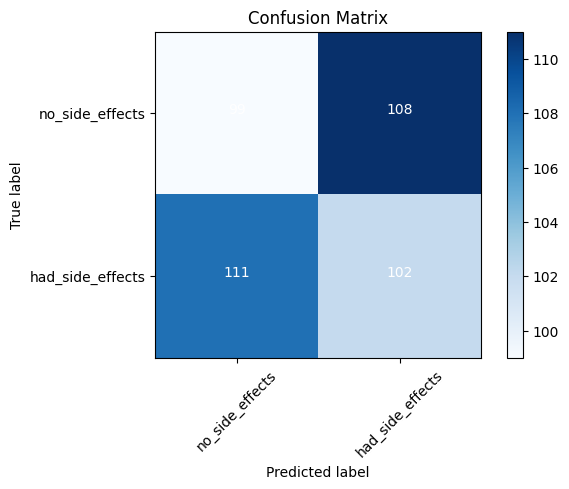

In [68]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')